In [1]:
# 1. 이미지 출력하기
import cv2
from matplotlib import pyplot as plt
imageFile = './images/hand2.jpg'
imgBGR = cv2.imread(imageFile) 
plt.axis('off')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

<Figure size 640x480 with 1 Axes>

sibal


In [54]:
# 2. 비디오 캡처와 화면 표시
import cv2
cap = cv2.VideoCapture(0)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_type:', type(frame_size), 'frame_size=', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key==27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_type: <class 'tuple'> frame_size= (640, 480)


In [65]:
# 3. 비디오 입력과 화면표시 - 유투브 동영상
# pafy : 비디오에서 메타데이터 획득, 비디오, 오디오를 다운로드 하는 패키지
# pafy의 뒤 backend에서 youtube_dl가 유투브 동영상을 다운로드한다.
import cv2, pafy
url = 'https://www.youtube.com/watch?v=gEbMBH5Pe9M'
video = pafy.new(url)
print('title=', video.title) # 제목
print('video.rating=', video.rating) # 등급
print('video.duration=',video.duration) # 재생시간

# video.getbest()로 비디오 파일양식 'webm'의 최적의 pafy.backend_youtube_dl, YtdlStream 클래스 객체 best를 생성하고
# best.resolution을 출력한다.
best = video.getbest(preftype='mp4') # 'mp4', '3gp'
print('best.resolution', best.resolution) 

cap = cv2.VideoCapture(best.url)
while(True):
    retval, frame = cap.read()
    if not retval:
        break
    cv2.imshow('frame',frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    cv2.imshow('edges', edges)
    key = cv2.waitKey(25)
    if key==27:
        break
cv2.destroyAllWindows()

title= [백종원의 장사이야기] 30회 첫 번째 '저희 집만 장사가 안 돼요.. 주말만 되면요..'
video.rating= 4.9264789
video.duration= 00:06:27
best.resolution 1280x720


In [ ]:
# 3. matplotlib 비디오 디스플레이
import cv2
import matplotlib.pyplot as plt

# (1)
def handle_key_press(event):
    if event.key=='escape':
        cap.release()
        plt.close()
def handle_close(evt):
    print('Clos figure!')
    cap.release()
    
# (2) 프로그램 시작
cap = cv2.VideoCapture(0) # 0번 카메라
plt.ion() # 대화모드 설정
fig = plt.figure(figsize=(10,6)) # fig.set_inches(10,6) 
plt.axis('off')
# ax = fig.gca()
# ax.set_axis_off()
fig.canvas.set_window_title('Video Capture')
fig.canvas.mpl_connect('key_press_event', handle_key_press)
fig.canvas.mpl_connect('close_event', handle_close)

retval, frame = cap.read() # 첫 프레임 캡처
im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# (3) 
while True:
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    fig.canvas.draw()
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
if cap.isOpened():
    cap.release()

In [ ]:
# 4. 흑백영상 접근
import cv2
img = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
print(img[100:110, 200:210]) # Roi 접근

for y in range(100,400):
    for x in range(200,300):
        img[y,x]=0

img[100:400, 200:300]=0 # ROI접근

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
# 5. 컬러 영상 접근
import cv2
img = cv2.imread('./images/lena.png')
img[100,200]=[255,0,0] # 컬러 BGR 접근
print(img[100, 200:210]) # ROI 접근

for y in range(100,400):
    for x in range(200,300):
        img[y,x] = [255,0,0] # 파란색으로 변경
img[100:400, 200:300]=[255,0,0] # ROI 접근

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
# 6.마우스로 ROI 영역 지정 (드래그)
# roi = (206, 236, 71, 150)인데 -> roi[0]은 x열 roi[1]은 y행, roi[2]는 width, roi[3]은 height
import cv2
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(src) # 마우스로 ROI 영역 지정 

print('roi=', roi)

# img에 roi영역 저장.
img = src[roi[1]:roi[1] + roi[3],
          roi[0]:roi[0] + roi[2]]

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

roi= (0, 0, 0, 0)


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [7]:
# 7. 영상 복사 copy와 참조 차이
import cv2
src = cv2.imread('./images/lena.png')

dst2 = src
dst = src.copy() # 복사

src[100:400, 200:300]=0

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# 8. 영상 크기 변환, 회전
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.resize(src, dsize = (320,240)) # resize 가로 320 세로 240으로
dst2 = cv2.resize(src, dsize=(0,0), fx=1.5, fy=1.2) # resize 가로 1.5배 세로 1.2배

dst_rotate = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst_rotate2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imshow('dst1',dst) # 가로세로 고정크기
cv2.imshow('dst2',dst2) # 가로 배율로 늘리기
cv2.imshow('dst_roate',dst_rotate) # 회전 시계방향
cv2.imshow('dst_rotate2',dst_rotate2) # 회전 반시계
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
# 9. 영상 어파인 변환 (확대/축소, 회전)
import cv2
import numpy as np
src = cv2.imread('./images/lena.png')

rows, cols, channels = src.shape
M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 0.5) # getRotataionMatrix2D( center, angle, scale) 
M2 = cv2.getRotationMatrix2D((rows/2, cols/2), -45, 1.0) 

dst1 = cv2.warpAffine(src, M1, (rows, cols)) # warpAffine( src, M, dsize) -> M은 변환행렬
dst2 = cv2.warpAffine(src, M2, (rows, cols))

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
# 10. 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=',ret)
cv2.imshow('dst',dst)

# thresh_otsu를 추가하면 임계값 thresh와 관계없이 otsu알고리즘으로 최적 임계값 계산 됨0
ret2, dst2 = cv2.threshold(src,200,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)# 즉 여기선 주어진 임계값 200이 아닌 170이 threshold가 됨.
print("ret2=",ret2)
cv2.imshow('dst2',dst2)

cv2.waitKey()
cv2.destroyAllWindows()

ret= 120.0
ret2= 124.0


In [22]:
# 11. 적응형 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

ret,dst = cv2.threshold(src,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('dst',dst)

# 젤 괜찮은 방법1
dst2 = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',dst2)

# 젤 괜찮은방법2
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',dst3)

cv2.waitKey()
cv2.destroyAllWindows()

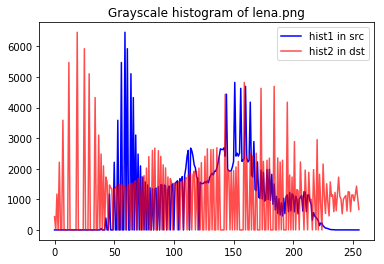

In [27]:
# 12. 그레이스케일 영상의 히스토그램 평활화
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('dst',dst)


plt.title('Grayscale histogram of lena.png')

hist1 = cv2.calcHist(images = [src], channels = [0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images = [dst], channels=[0], mask = None, histSize = [256], ranges=[0,256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
# 13. 컬러영상의 히스토그램 평활화
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('./images/lena.png')
cv2.imshow('src',src)

#1 hsv
# 1-1 색을 split로 분리하기
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# 1-2 분리한 채널에서 v를 히스토그램 평활화 진행
v2 = cv2.equalizeHist(v)

# 1-3 분리하여 히스토그램 평활화 한 v2를 다시 합친다.
hsv2 = cv2.merge([h,s,v2])
dst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst',dst)

# 2 yCrCb - 밝기값 채널인 y에 히스토그램 평활화 적용
# 2-1 색을 split로 분리하기
yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(yCrCb)

# 2-2 분리한 채널에서 y를 히스토그램 평활화를 진행
y2 = cv2.equalizeHist(y)

# 2-3 분리하여 히스토그램 평활화 한 y2를 다시 합친다.
yCrCb2 = cv2.merge([y2, Cr, Cb])
dst2 = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
# 14. 역투영 - 정해진 임계치와 비슷한 영역만 검출하기
# 추적할 물체를 관심 영역으로 지정한 후에, 컬러 정보(hue)의 히스토그램을 계산하고, 추적할 때, 계산된 히스토그램을 비디오에 역투영하고
# 임계치를 적용하여 추적을 위한 영상과 컬러 정보가 비슷한 영역만을 검추랗ㄹ 수 있다. 
# 비디오 물체추적 방법은 meanShift, CamShift 함수에서 히스토그램 역투영을 사용한다.

import cv2
import numpy as np

img = cv2.imread("./images/hand2.jpg")
img = cv2.resize(img, dsize=(300,300))

# YCrCb 로 변환
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

# 1-1 ycrcb 손모양만 검출
# 살색은 기본적으로 : Cr:133 ~ 173, Cb :"77~127
# YCrCb -> y는 휘도성분, Cb와 Cr은 색차 성분 -> 색차란 임의의 색과 그 색과 같은 휘도를 가진 기준색과의 측색적인 차이
# inRange함수는 특정색만 검출할 때 (0~255, 133~173. 77 ~ 127)
hand = cv2.inRange(img_ycrcb, np.array([0,133,77]), np.array([255,173,127]))

cv2.imshow("origin",img)
cv2.imshow("hand",hand)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# 15 영상 잡음제거 및 부드럽게 블러 & 스무딩
# boxFilter(주변평균값필터), bilateralFilter(양방향), medianBlur, GaussianBlur 필터
# 필터는 또는 윈도우라고 부르는데, 3x3, 5x5, 7x7,11x11과 같이 홀수크기를 주로 사용.
import cv2
import numpy as np

src = cv2.imread('./images/lena.png')
dst1 = cv2.boxFilter(src, ddepth=-1, ksize=(11,11))  # ddepth -> 출력화소의 구조 -1이면 src와 똑같
dst2 = cv2.boxFilter(src, ddepth=-1, ksize=(21,21)) # ddepth -> 출력화소의 구조 -1이면 src와 똑같

dst3 = cv2.bilateralFilter(src, d=11, sigmaColor=10, sigmaSpace=10)
dst4 = cv2.bilateralFilter(src, d=-1, sigmaColor=10, sigmaSpace=10)

# box형 필터
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)

# 양방향 필터
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# 16 미디안 필터, 블러, 가우시안 필터
import cv2
import numpy as np

src = cv2.imread('./images/lena.png')
dst1 = cv2.medianBlur(src, ksize=7)
dst2 = cv2.blur(src, ksize=(7,7))
dst3 = cv2.GaussianBlur(src, ksize=(7,7), sigmaX = 0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7,7), sigmaX = 10.0)

cv2.imshow('medianblur',dst1) # medainblur
cv2.imshow('blur',dst2)
cv2.imshow('gaussianblur_sigmaX=0',dst3)
cv2.imshow('gaussianblur_sigmaX=10.0',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
# 17. 미분필터 - Sobel 필터
# ksize=3 에서의 1차 필터
#  -1  0  1    -1 -2 -1         1  0  -1
#  -2  0  2     0  0  0         0  0  0
#  -1  0  1     1  2  1        -1  0  1
#  dx=1, dy=0  / dx=0 dy=1  / dx=1, dy=1

# ksize=3에서 2차 미분 필터
#  1  -2  1    1  2  1      1  -2  1
#  2  -4  2   -2 -4  -2    -2  4  -2
#  1  2  1    1   2  1     1  -2  1
#  dx=2, dy=0  / dx=0 dy=0  / dx=2 dy=2

import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)

#1 - Sobel함수 계산
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3) # x에게로 1차 편미분
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3) # y에게로 1차 편미분

#2 - 세로잘나오게
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3 - 가로 잘나오게
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)

#4 - 가로세로 둘다 잘나오게
mag = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src',src)
cv2.imshow('dstX',dstX) # 세로선 더 잘잡음 (행)
cv2.imshow('dstY',dstY) # 가로선 더 잘잡음 (열)
cv2.imshow('dstM',dstM) # 
cv2.waitKey()
cv2.destroyAllWindows()

mag: 0.0 672.8714599609375 (0, 0) (118, 274)


In [5]:
# 18. Laplacian 필터
import cv2
import numpy as np

#1 원본, 블러처리 두개 만들기
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7,7), sigmaX=0.0)
cv2.imshow('src', src)
cv2.imshow('blur', blur)

# 2 블러처리 안한 영상에 Laplacian
lap = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0,255,cv2.NORM_MINMAX)
cv2.imshow('lap',lap)
cv2.imshow('dst', dst)

#3 블러처리한 영상에 Laplacian
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2', lap2)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

# 결론 - blur 처리한게 더 엣지를 잘 검출해냄. (흔히 미분 오차를 줄이기 위해서 blur를 한다고 함)

lap: -199.0 168.0 (70, 414) (212, 299)
lap2: -34.0 26.0 (180, 435) (163, 409)


In [8]:
# 19. filter2D()와 sepFilter2D() 에 의한 엣지 검출
# 앵커점은 필터의 기준이 되는 중심점으로 필터 크기가 3x3이면 anchor = Point(1,1)이고, 필터 크기가 5x5이면 anchor=Point(2,2) 이다.
# OpenCV는 cv2.filter2D()와 cv2.sepFilter2D()로 함수에 적용 가능하다.
# filter2D(src, ddepth, kernel) 입력 src에 윈도우 kernel을 이용하여 회선을 계산하여 dst에 저장한다.
# sepFilter2D(src, ddepth, kernelX, kernelY) kernelX 적용한 결과의 각 열에 커널 kernelY 적용하여 필터링
# ddepth는 dst의 화소 깊이로 ddepth=-1이면 입력과 같은 화소 깊이
# kernel은 1-채널 실수 배열로 src의 모든 채널에 동일하게 적용된다. anchor는 커널의 중심점으로 kernel내의 위치

import cv2
import numpy as np

src= cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)

#1 미분선형 필터 kx, ky 생성후 
kx, ky = cv2.getDerivKernels(1,0,ksize=3) # 커널 생성
sobelX = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelX=', sobelX)
gy = cv2.filter2D(src, cv2.CV_32F, sobelX)
## gx = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#2
kx, ky = cv2.getDerivKernels(0, 1, ksize=3) # 커널 생성
sobelY = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelY=', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)
## gy = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

# 3 
mag = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()

kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [12]:
# 20 모폴로지 연산
# 침식(erode), 팽창(diate), 열기 (open), 닫기(closing)
# getStructuringElement() , erode(), dilate(), morphologyEx 등
# getStructuringElement() 함수는 모폴로지 연산에 사용하는 MORPH_RECT, MORPH_ELLIPSE, MORPH_CROSS 모양의 ksize 크기 구조요소 반환

import cv2
import numpy as np

src = cv2.imread('./images/morphology.png', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize =(3,3))
closing = cv2.morphologyEx(src, cv2.MORPH_CLOSE ,kernel, iterations =5)
opening = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel, iterations=5)
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)

tophat = cv2.morphologyEx(src, cv2.MORPH_TOPHAT, kernel, iterations = 5)
balckhat = cv2.morphologyEx(src, cv2.MORPH_BLACKHAT, kernel, iterations = 5)

cv2.imshow('opening', opening)
cv2.imshow('closing', closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('balckhat', balckhat)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
# 21 템플릿 매칭
# 템플릿 매칭은 물체 인식, 스테레오 영상에서 대응점 검출등에 사용될 수 있다. 
# 템플릿 매칭은 이동(translation) 문제는 해결할 수 있지만, 회전 및 스케일링된 물체에 대한 매칭은 여러 개의 템플릿을 이용할수있으나 어려움
# 에지, 코너점, 주파수 변환등의 특징 공간으로 변환하여 템프릿 매칭을 수행할 수도 있으며, 영상의 밝기 등에 덜 민감하도록 정규화 과정 필요
# 매칭 방법은 상관관계(correlatin), SAD(Sum of absolute differences) 등을 사용한다.
# method = cv2.TM_SQDIFF - 템플릿 T를 탐색영역 I에서 이동시켜가며 차이의 제곱합계를 계산한다.
# method = cv2.TM_SQDIFF_NORMED - R(sqdiff)을 D로 나누어 정규화한다.
# method = cv2.TM_CCORR - 템플릿 T를 탐색영역 I에서 이도이켜가며 곱의 한계를 계산한다.
# method = cv2.TM_CCORR_NORMED - R(ccorr)을 D로 나누어 정규화한다.
# method = cv2.TM_CCOEFF - T은 템플릿 T의 각 요소값에서 평균을 뺄셈한 변환 템플릿이며 각 평균값으로 보정하여 비교함. 매칭되는 위치에서 큰 값을 가짐
# method = cv2.TM_CCOEFF_NORMED - R(ccoeff)을 D로 나누어 정규화한다.
import cv2
import numpy as np

src = cv2.imread('./images/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A = cv2.imread('./images/a.bmp', cv2.IMREAD_GRAYSCALE)
tmp_B = cv2.imread('./images/b.png', cv2.IMREAD_GRAYSCALE)
tmp_D = cv2.imread('./images/d.png', cv2.IMREAD_GRAYSCALE)
tmp_G = cv2.imread('./images/g.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

#1 
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)

w, h = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0] + h, minLoc[1] + w),(255,0,0,),2)

#2 - 
R2 = cv2.matchTemplate(src, tmp_B, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
w, h = tmp_B.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0] +h, maxLoc[1] + w), (0,255,0), 2)

#3 - TM_CCOEFF_NORMED 방법으로 매칭한 결과를 R3에 저장
R3 = cv2.matchTemplate(src, tmp_D, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED', maxVal, maxLoc)
w, h = tmp_D.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0] + h, maxLoc[1] + w), (0,0,255), 2)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

TM_SQDIFF_NORMED: 0.08154726028442383 (50, 123)
TM_CCORR_NORMED: 0.9240342974662781 (71, 265)
TM_CCOEFF_NORMED 0.5613447427749634 (218, 268)


In [18]:
# 22 Canny 엣지 검출
# 히스테리시스 임계값에 사용되는 두 임계값 threshold1과 threshold2를 사용하여 연결된 엣지를 얻는다. 
# 먼저 높은 값의 임계값을 사용하여 그레디언트 방향에서 낮은 값의 임계값이 나올 떄까지 추적하며 에지를 연결하는 히스테리시스 임계값 방식을 사용/
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)

edges1 = cv2.Canny(src, 50, 100)
edges2 = cv2.Canny(src, 50, 200)

cv2.imshow('edges1', edges1)
cv2.imshow('edges2', edges2)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
# 23 Hough 변환에 의한 직선, 원 검출
# Sobel, Log, Canny로 검출한 엣지는 단순히 화소들의 집합이다. Hough변환을 사용하면 직선 또는 원의 방정식의 파라미터를 검출할 수 있다.
# 즉 위의 방법으로 구한 엣지는 사각형, 직선, 원, 곡선 등의 구조적 정보를 갖지 안흔다.
# HoughLines
import cv2
import numpy as np

src=cv2.imread('./images/figure.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180.0, threshold=100) # edge에 저장, rho=원점으로부터의 거리 간격 theta는 x축과의 각도, threshold는 직선을 검출하기 위한 임계값
print('lines.shape=',lines.shape)

# lines 는 (27, 1, 2) -> 27개의 직선 / rho - 거리 1 / theta - 2라디안 
for line in lines:
    rho, theta = line[0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c * rho
    y0 = s * rho
    x1 = int(x0 + 1000 * (-s))
    y1 = int(y0 + 1000 * (c))
    x2 = int(x0 -1000 * (-s))
    y2 = int(x0 -1000 * (c))
    cv2.line(src, (x1,y1),  (x2,y2), (0,0,255), 2)
    
cv2.imshow('edges', edges)
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

lines.shape= (27, 1, 2)


In [23]:
# 24 Hough 선분 검출 HoughLinesP()
import cv2
import numpy as np

src = cv2.imread('./images/figure.png')
gray= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180.0, threshold=100)
print('lines.shape=', lines.shape)

for line in lines:
    x1, y1, x2, y2 = line[0] # 각 선분의 양 끝점 정보
    cv2.line(src, (x1,y1), (x2,y2), (0,0,255), 2)

cv2.imshow("edges",edges)
cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

lines.shape= (21, 1, 4)


In [26]:
# 25 HoughCircle() 원 검출
import cv2
import numpy as np

#1 
src1 = cv2.imread('./images/circle1.png')
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)
circles1 = cv2.HoughCircles(gray1, method=cv2.HOUGH_GRADIENT, dp=1, minDist=50, param2=15)
print('circles1.shape=', circles1.shape)

# circles.shape -> (1,6,3) -> 6개의 행이 원의 cx, cy, r을 저장함
for circle in circles1[0,:]:
    cx, cy, r = circle
    cv2.circle(src1, (cx,cy),r,(0,0,255),2)
cv2.imshow('src1', src1)

cv2.waitKey()
cv2.destroyAllWindows()

circles1.shape= (1, 14, 3)


In [30]:
# 26 inRange를 이용한 영역 검출
import cv2
import numpy as np

#1 살색에 대한 영역 검출
src1 = cv2.imread('./images/hand2.jpg')
hsv1 = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
lowerb1 = (0,40,0)
upperb1 = (20,180,255)

dst1 = cv2.inRange(hsv1, lowerb1, upperb1)

#2 
src2 = cv2.imread('./images/flower.jpg')
hsv2 = cv2.cvtColor(src2, cv2.COLOR_BGR2HSV)
lowerb2 = (150,100,100)
upperb2 = (180,255,255)
dst2 = cv2.inRange(hsv2, lowerb2, upperb2)

#3
cv2.imshow('src1',src1)
cv2.imshow('dst1',dst1)
cv2.imshow('src2',src2)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
# 27 윤곽선 검출

import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50,100), (450,400), (255,255,255), -1)
cv2.rectangle(src, (100,150), (400,350), (0,0,0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255,255,255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#2 
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(gray, mode, method)
print('type(contours)=', type(contours)) # list
print('type(contours[0])=', type(contours[0])) # ndarray
print('len(contours)=', len(contours)) # mode가 RETR_EXTERNAL이라서 가장 외곽선 1개만 추출됨
print('contours[0].shape=', contours[0].shape) # (4,1,2 )-> 4개의 검출된 자표가 1,2 배열에 저장됨
print('contours[0]=', contours[0])

#3 윤곽선 그리기
cv2.drawContours(src,contours, -1, (255,0,0), 3) # 모든 윤곽선 - BLUE (테두리)

#4 
for pt in contours[0][:]: # 윤곽선 좌표
    cv2.circle(src,(pt[0][0], pt[0][1]), 5, (0,0,255), -1)
    
cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

type(contours)= <class 'list'>
type(contours[0])= <class 'numpy.ndarray'>
len(contours)= 1
contours[0].shape= (4, 1, 2)
contours[0]= [[[ 50 100]]

 [[ 50 400]]

 [[450 400]]

 [[450 100]]]


In [46]:
# 28 윤곽선 검출 및 그리기 
# RETR_LIST - 모든 점 검출하기, 윤곽선 검출하기
import cv2
import numpy as np

#1
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50,100), (450,400), (255,255,255), -1)
cv2.rectangle(src, (100,150), (400,350), (0,0,0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255,255,255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#2 
mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(gray, mode, method)

print('len(contours)=', len(contours)) # mode가 RETR_LIST로 리스트 contours에 len(contours)=3개의 모든 윤곽선을 검출
print('contours[0].shape=', contours[0].shape) # (4,1,2 )-> 4개의 검출된 자표가 1,2 배열에 저장됨
print('contours=', contours)

#3 모듄 윤곽선 출력
for cnt in contours:
    cv2.drawContours(src, [cnt], 0, (0,255,0), 3)
    for pt in cnt: # 윤곽선 좌표
        cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

len(contours)= 3
contours[0].shape= (4, 1, 2)
contours= [array([[[200, 200]],

       [[200, 300]],

       [[300, 300]],

       [[300, 200]]], dtype=int32), array([[[ 99, 150]],

       [[100, 149]],

       [[400, 149]],

       [[401, 150]],

       [[401, 350]],

       [[400, 351]],

       [[100, 351]],

       [[ 99, 350]]], dtype=int32), array([[[ 50, 100]],

       [[ 50, 400]],

       [[450, 400]],

       [[450, 100]]], dtype=int32)]


In [48]:
# 29. 영역 채우기 - floodFill
import cv2
import numpy as np

#1 
src = np.full((512,512,3), (255,255,255), dtype = np.uint8)
cv2.rectangle(src, (50,50), (200,200), (0,0,255),2)
cv2.circle(src, (300,300), 100, (0,0,255), 2)

#2 src 복사해서 내부 채움 floodfill로
dst = src.copy()
cv2.floodFill(dst, mask = None, seedPoint=(100,100), newVal = (255,0,0))

#3 seedPoint는 시작점.
retval ,dst2, mask, rect = cv2.floodFill(dst, mask = None, seedPoint = (300,300), newVal = (0,255,0))
print('rect=', rect)
x,y,width, height = rect
cv2.rectangle(dst2, (x,y), (x+width, y+height), (255,0,0),2)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

rect= (202, 202, 197, 197)


In [50]:
# 30 distanceTransform() 거리 계산
import cv2
import numpy as np

#1 
src = np.zeros(shape=(512,512), dtype=np.uint8)
cv2.rectangle(src, (50,200), (450,300), (255,255,255), -1)

#2 
dist = cv2.distanceTransform(src, distanceType=cv2.DIST_L1, maskSize=3)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype = cv2.CV_8U)
ret, dst2 = cv2.threshold(dist, maxVal-1, 255, cv2.THRESH_BINARY)

#3 
gx = cv2.Sobel(dist, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(dist, cv2.CV_32F, 0, 1, ksize=3)
mag = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('src:', minVal, maxVal, minLoc, maxLoc)
ret, dst3 = cv2.threshold(mag, maxVal-2, 255, cv2.THRESH_BINARY_INV)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.waitKey()
cv2.destroyAllWindows()

src: 0.0 51.0 (0, 0) (100, 250)
src: 0.0 8.0 (0, 0) (52, 200)


In [ ]:
# 31 WaterShed() 영상 분할
import cv2
import numpy as np

#1 
src = cv2.imread('./images/hand2.jpg')
mask = np.zeros(shape=src.shape[:2], dtype=np.uint8)
markers= np.zeros(shape=src.shape[:2], dtype=np.int32)

dst = src.copy()
cv2.imshow('dst', dst)

#2
def onMouse(event, x, y, flags, param):
    if event==cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(param[0], (x,y), 10, (255,255,255), -1)
            cv2.circle(param[1], (x,y), 10, (255,255,255), -1)
        cv2.imshow('dst', param[1])

#3
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
while True:
    cv2.setMouseCallback('dst', onMouse, [mask, dst])
    key = cv2.waitKey(30)
    
    if key==0x1B:
        break
    elif key==ord('r'):
        mask[:,:]=0
        dst=src.copy()
        cv2.imshow('dst', dst)
    elif key==ord(' '):
        contours, hierarchy = cv2.findContours(mask, mode, method)
        print('len(contours)=',len(contours))
        markers[:,:]=0
        for i, cnt in enumerate(contours):
            cv2.drawContours(markers, [cnt], 0, i+1, -1)
        cv2.watershed(src,markers)
        
        # 3-4
        dst = src.copy()
        dst[markers==-1] = [0,0,255] # 경계선 
        for i in range(len(contours)): # 분할영역
            r=np.random.randint(256)
            g=np.random.randint(256)
            b=np.random.randint(256)
            dst[markers == i+1]=[b,g,r]
    dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0) # 합성
    cv2.imshow('dst', dst)
cv2.destroyAllWindows()

In [48]:

import cv2
import numpy as np

img = cv2.imread("C:/Users/urse/Desktop/python-opencv/images/hand2.jpg",1)
img = cv2.resize(img, dsize=(300,300))

# gray로 변환, YCrCb 로 변환
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",img_gray)

img_ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

# 1-1 ycrcb 손모양만 검출
# 살색은 기본적으로 : Cr:133 ~ 173, Cb :"77~127
# YCrCb -> y는 휘도성분, Cb와 Cr은 색차 성분 -> 색차란 임의의 색과 그 색과 같은 휘도를 가진 기준색과의 측색적인 차이
# inRange함수는 특정색만 검출할 때 (0~255, 133~173. 77 ~ 127)
hand = cv2.inRange(img_ycrcb, np.array([0,133,77]), np.array([255,173,127]))

# 1-2 손모양 contour 테두리 그리기
img_gray = cv2.blur(img_gray, (9,9))
_, img_gray = cv2.threshold(img_gray, 5, 255, cv2.THRESH_BINARY)
cv2.imshow("gray",img_gray)

# open작업을 통한 노이즈 제거
gray_img = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, np.ones((3,3), np.uint8), iterations=2)

# 외곽 contour 검출
contours, _ = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
cv2.drawContours(img, contours, -1, (0,255,0), 3)
cv2.imshow("origin",img)
cv2.imshow("hand",hand)
cv2.waitKey(0)
cv2.destroyAllWindows()

1


In [23]:
import cv2

src = cv2.imread("C:/Users/urse/Desktop/python-opencv/images/figure.png", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

contours, hierachy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    print(i, hierachy[0][i])
    cv2.imshow("src", src)
    cv2.waitKey(0)

cv2.destroyAllWindows()

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [ 7  5 -1 -1]
7 [ 8  6 -1 -1]
8 [ 9  7 -1 -1]
9 [10  8 -1 -1]
10 [11  9 -1 -1]
11 [-1 10 -1 -1]


In [ ]:
int getFingerCount(const Mat& mask, Point center, double radius, double scale=2.0){
    # 손가락 개수를 세기 위한 원 그리기
    Mat cImg(mask.size(), CV_8U, Scalar(0));
    circle(cImg, center, radius*scale, Scalar(255));

    # 원의 외곽선을 저장할 벡터
    vector<vector<Point>> contours;
    findContours(cImg, contours, CV_RETR_EXTERNAL, CV_CHAIN_APPROX_SIMPLE);

    if(contours.size()==0)   //외곽선이 없을 때 == 손 검출 X
    return -1;

    # 외곽선을 따라 돌며 mask의 값이 0에서 1로 바뀌는 지점 확인
    int fingerCount=0;
    for(int i=1; i<contours[0].size(); i++){
    Point p1=contours[0][i-1];
    Point p2=contours[0][i];
    if (mask.at<uchar>(p1.y, p1.x)==0 && mask.at<uchar>(p2.y, p2.x)>1):
        fingerCount++;
    }

    # 손목과 만나는 개수 1개 제외
    return fingerCount-1;
}